In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
properties = ['FOV', 'Sp. Resolution', 'En. Range', 'Ang. Resolution', 'Duty Cycle']
normalizations = [4*np.pi, 1./0.01, 1e4, 1./(0.6/60.), 100.]
log_scale=[False, False, True, False, False]

In [3]:
integral = [  4*np.pi, 
  1./0.1,
  1e4,
  1./(3./60),
  85.
           ]

In [4]:
GBM = [
    2*np.pi,
    1.,
    1e3,
    1./ (3),
    50.
]

In [5]:
def make_skills(properties, values, normalizations, log_scale):
    skills = {}
    
    for a,b,c,d in zip (properties, values, normalizations, log_scale):
        if d:
            skills.update({a : np.log10(b)/np.log10(c) * 100})
        else:
            skills.update({a : b/c * 100})
    
    return skills

integral_skills = make_skills(properties, integral, normalizations, log_scale)
gbm_skills = make_skills(properties, GBM, normalizations, log_scale)


In [6]:
df = pd.DataFrame([integral_skills, gbm_skills])

In [7]:
skills = list(df)
num_skills = len(skills)


In [8]:
from math import pi

angles = [i / float(num_skills) * 2 * pi for i in range(num_skills)]
#angles += angles[:1]  # repeat the first value to close the circle

<IPython.core.display.Javascript object>


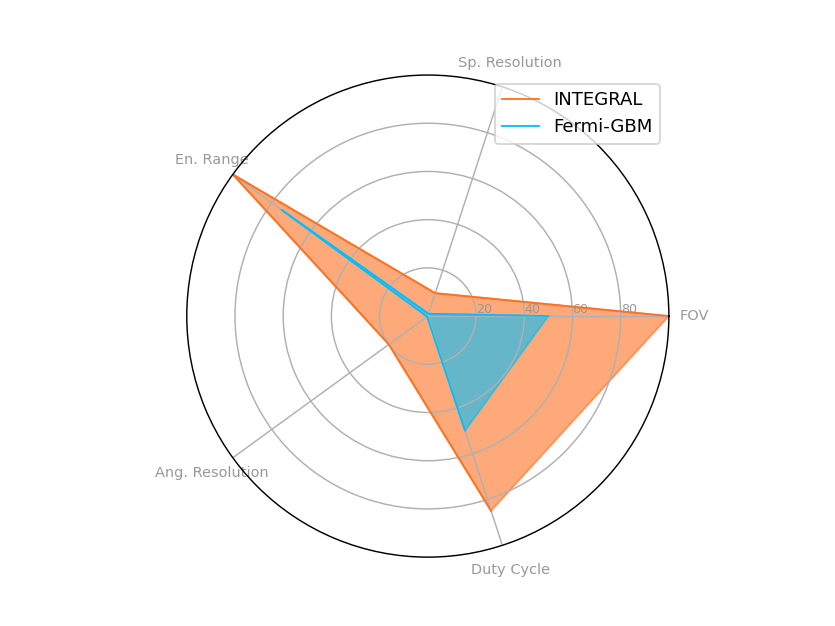

(0.0, 100.0)

In [9]:

GRAY = '#999999'

# Clear the plot to start with a blank canvas.
plt.clf()

# Create subplots for each data series
series_1 = plt.subplot(1, 1, 1, polar=True)
series_2 = plt.subplot(1, 1, 1, polar=True)

# Draw one x-axis per variable and add labels
plt.xticks(angles, skills, color=GRAY, size=8)

# Draw the y-axis labels. To keep the graph uncluttered,
# include lines and labels at only a few values.
plt.yticks(
  [20, 40, 60, 80],
  ['20', '40', '60', '80'],
  color=GRAY,
  size=7
)

# Constrain y axis to range 0-100
plt.ylim(0,100)

In [10]:
series_1_values = df.loc[0] \
                    .values \
                    .flatten() \
                    .tolist()
#series_1_values += series_1_values[:1]  # duplicate first element to close the circle

series_2_values = df.loc[1] \
                    .values \
                    .flatten() \
                    .tolist()
#series_2_values += series_2_values[:1]
print(series_1_values, series_2_values)

[100.0, 10.0, 100.0, 20.0, 85.0] [50.0, 1.0, 75.0, 0.3333333333333333, 50.0]


In [11]:
# Set up colors
ORANGE = '#FD7120'
BLUE = '#00BFFF'

# Plot the first series
series_1.set_rlabel_position(0)
series_1.plot(
  angles,
  series_1_values,
  color=ORANGE,
  linestyle='solid',
  linewidth=1, label='INTEGRAL'
)
series_1.fill(
  angles,
  series_1_values,
  color=ORANGE,
  alpha=0.6
)


# Plot the second series
series_2.set_rlabel_position(0)
series_2.plot(
  angles,
  series_2_values,
  color=BLUE,
  linestyle='solid',
  linewidth=1,
    label='Fermi-GBM'
)
series_2.fill(
  angles,
  series_2_values,
  color=BLUE,
  alpha=0.6
)
plt.legend()